In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,root_mean_squared_error
import math
import datetime
import pandas as pd
import numpy as np

In [2]:
Amazon=pd.read_csv("Delivery_amazon.csv")
Amazon.head()

,Unnamed: 0,Order_ID,Agent_Age,Agent_Rating,Store_Latitude,Store_Longitude,Drop_Latitude,Drop_Longitude,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,distance
0,0,ialx566343618,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,2.288918
1,1,akqg208421122,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,14.777225
2,2,njpu434582536,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,1.136966
3,3,rjto796129700,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,5.698649
4,4,zguw716275638,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,4.510871


In [3]:
Amazon=Amazon.loc[:,~Amazon.columns.str.contains('^Unnamed')]

In [4]:
Amazon=Amazon.drop(['Store_Latitude',
  'Store_Longitude', 'Drop_Latitude', 'Drop_Longitude'],axis=1)

In [5]:
Amazon.columns

Index(['Order_ID', 'Agent_Age', 'Agent_Rating', 'Order_Date', 'Order_Time',
       'Pickup_Time', 'Weather', 'Traffic', 'Vehicle', 'Area', 'Delivery_Time',
       'Category', 'distance'],
      dtype='object')

In [6]:
Amazon['Order_Date'] = pd.to_datetime(Amazon['Order_Date'])  # Convert to datetime if it's not already

# Extracting
Amazon['Year'] = Amazon['Order_Date'].dt.year
Amazon['Month'] = Amazon['Order_Date'].dt.month
Amazon['DayOfWeek'] = Amazon['Order_Date'].dt.dayofweek

In [7]:
Amazon.head()

,Order_ID,Agent_Age,Agent_Rating,Order_Date,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,distance,Year,Month,DayOfWeek
0,ialx566343618,37,4.9,2022-03-19,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,2.288918,2022,3,5
1,akqg208421122,34,4.5,2022-03-25,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,14.777225,2022,3,4
2,njpu434582536,23,4.4,2022-03-19,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,1.136966,2022,3,5
3,rjto796129700,38,4.7,2022-04-05,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,5.698649,2022,4,1
4,zguw716275638,32,4.6,2022-03-26,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,4.510871,2022,3,5


In [8]:
Amazon=Amazon.drop('Order_Date',axis=1)

In [9]:
Amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43594 entries, 0 to 43593
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       43594 non-null  object 
 1   Agent_Age      43594 non-null  int64  
 2   Agent_Rating   43594 non-null  float64
 3   Order_Time     43594 non-null  object 
 4   Pickup_Time    43594 non-null  object 
 5   Weather        43594 non-null  object 
 6   Traffic        43594 non-null  object 
 7   Vehicle        43594 non-null  object 
 8   Area           43594 non-null  object 
 9   Delivery_Time  43594 non-null  int64  
 10  Category       43594 non-null  object 
 11  distance       43594 non-null  float64
 12  Year           43594 non-null  int32  
 13  Month          43594 non-null  int32  
 14  DayOfWeek      43594 non-null  int32  
dtypes: float64(2), int32(3), int64(2), object(8)
memory usage: 4.5+ MB


In [10]:
Amazon.head()

,Order_ID,Agent_Age,Agent_Rating,Order_Time,Pickup_Time,Weather,Traffic,Vehicle,Area,Delivery_Time,Category,distance,Year,Month,DayOfWeek
0,ialx566343618,37,4.9,11:30:00,11:45:00,Sunny,High,motorcycle,Urban,120,Clothing,2.288918,2022,3,5
1,akqg208421122,34,4.5,19:45:00,19:50:00,Stormy,Jam,scooter,Metropolitian,165,Electronics,14.777225,2022,3,4
2,njpu434582536,23,4.4,08:30:00,08:45:00,Sandstorms,Low,motorcycle,Urban,130,Sports,1.136966,2022,3,5
3,rjto796129700,38,4.7,18:00:00,18:10:00,Sunny,Medium,motorcycle,Metropolitian,105,Cosmetics,5.698649,2022,4,1
4,zguw716275638,32,4.6,13:30:00,13:45:00,Cloudy,High,scooter,Metropolitian,150,Toys,4.510871,2022,3,5


In [11]:

#regression
# target variable is delivery time
ama=Amazon

In [12]:
ama=ama.select_dtypes(include=np.number)

<Axes: >

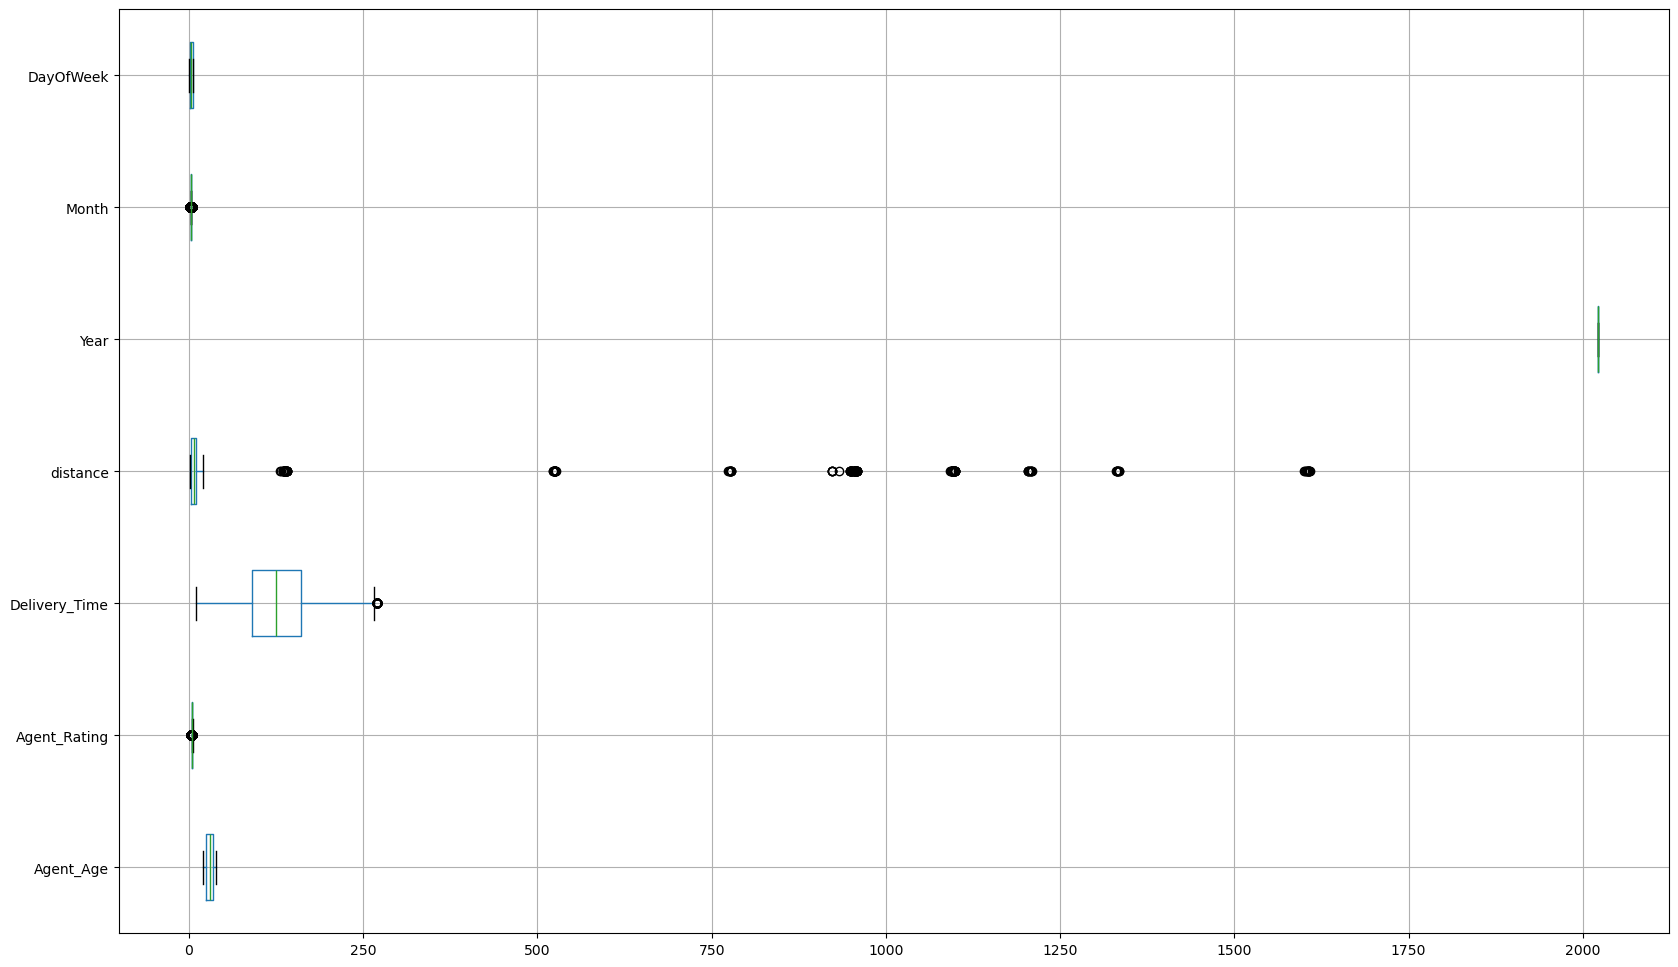

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (20,12))
ama.boxplot(vert = False)

In [14]:
## New method for outliers(using Numpy)

def remove_outlier(col):
  sorted(col)
  q1, q3 = np.percentile(col, [25,75])
  IQR = q3 - q1
  LW = q1 - (1.5 * IQR)
  UW = q3 + (1.5 * IQR)
  return LW, UW

In [15]:
for column in ama.drop([ 'distance', 'Delivery_Time'], axis = 1).columns:
  LW, UW = remove_outlier(ama[column])
  ama[column] = np.where(ama[column] > UW, UW, ama[column])
  ama[column] = np.where(ama[column] < LW, LW, ama[column])

In [16]:
ama.head()

,Agent_Age,Agent_Rating,Delivery_Time,distance,Year,Month,DayOfWeek
0,37.0,4.9,120,2.288918,2022.0,3.0,5.0
1,34.0,4.5,165,14.777225,2022.0,3.0,4.0
2,23.0,4.4,130,1.136966,2022.0,3.0,5.0
3,38.0,4.7,105,5.698649,2022.0,3.0,1.0
4,32.0,4.6,150,4.510871,2022.0,3.0,5.0


In [17]:
X=ama[['distance','Month','Year','Agent_Age']]
y=ama['Delivery_Time']

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
X_train.shape,y_train.shape

((34875, 4), (34875,))

In [20]:
X_test.shape,y_test.shape

((8719, 4), (8719,))

In [21]:
#model building
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [22]:
#test accuracy
y_pred=model.predict(X_test)
y_pred

array([104.8936785 , 102.48919643, 133.41778872, ..., 102.42838883,
       145.08894886, 119.15092412])

In [23]:
r2_score(y_test,y_pred)

0.05798986687427565

In [24]:
#training accuracy
y_train_pred=model.predict(X_train)

In [25]:

r2_score(y_train,y_train_pred)

0.06898427403646323

In [26]:
#test
mae=mean_absolute_error(y_test,y_pred)

In [27]:
mse=mean_squared_error(y_test,y_pred)

In [28]:
rmse=root_mean_squared_error(y_test,y_pred)

In [ ]:
import mlflow
import mlflow.sklearn

# Set up MLflow experiment and tracking URI
mlflow.set_experiment("Regression")
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

# Ensure that the model and X_test are already defined before making predictions
y_pred = model.predict(X_test)  # Ensure X_test and model exist

# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Root Mean Squared Error

# Start an MLflow run
with mlflow.start_run():
    mlflow.set_tag("Run name","regression") 
    params = {
        "fit_intercept": model.fit_intercept,
        "normalize": model.normalize if hasattr(model, "normalize") else "Not Available"
    }

    mlflow.log_params(params)  # Log the parameters

    # Log evaluation metrics
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("RMSE", rmse)

    # Log the trained model
    mlflow.sklearn.log_model(model, "Regression Model")

print("Successfully logged to MLflow")


In [31]:
model_name = "Regression"
run_id = "6210f3e6380c412386fc1185d6fd0d0d"

model_uri = f"runs:/{run_id}/random_forest"

model_version = mlflow.register_model(model_uri=model_uri, name=model_name)

print(f"Model '{model_name}' successfully registered as version {model_version.version}.")


Successfully registered model 'Regression'.
2025/02/13 17:03:41 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Regression, version 1


Model 'Regression' successfully registered as version 1.


Created version '1' of model 'Regression'.
